<a href="https://colab.research.google.com/github/ndlrh/tugaspython/blob/main/pythondaun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [3]:
ls

'1101194284_Nadillah Rahmatia Kautsari_1.pdf'
'1101194284_NADILLAH RAHMATIA KAUTSARI_2.pdf'
'1101194284_NADILLAH RAHMATIA KAUTSARI_3.pdf'
'1101194284_NADILLAH RAHMATIA KAUTSARI_4.pdf'
'1101194284_NADILLAH RAHMATIA KAUTSARI_5.pdf'
 1.pdf
 2.pdf
 3.pdf
 4.pdf
 Classroom/
'Jurnal Modul 4.pdf'
'JURNAL MODUL 5 REG.pdf'
'Nadillah Rahmatia Kautsari 1101194284.pdf'
'new doc 2020-11-23 12.36.17_20201123123626.pdf'
'new doc 2020-11-23 12.45.37_20201123124547.pdf'
 nnmodel_scene/
 PYTHONTUGAS/
'Tugas besar python'/
'TUGAS PYTHON'/
'VIDEO DEMO PYTHON'/


In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [6]:
print("[INFO] loading images...")
imagePaths = paths.list_images("PYTHONTUGAS")
data = []
labels = []

[INFO] loading images...


In [7]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [8]:
print(labels)

['satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB', 'satuGMB'

In [9]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [10]:
print(labels)

[[0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [11]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(444, 32, 32, 3)
(148, 32, 32, 3)


In [12]:
from keras.layers import Convolution2D, MaxPooling2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(32,32,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               57700     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 5

In [13]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [38]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=17, batch_size=30)

Epoch 1/17
15/15 [==============================] - 0s 22ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2627 - val_accuracy: 0.7973
Epoch 2/17
15/15 [==============================] - 0s 21ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2593 - val_accuracy: 0.7905
Epoch 3/17
15/15 [==============================] - 0s 19ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.2540 - val_accuracy: 0.7905
Epoch 4/17
15/15 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2637 - val_accuracy: 0.7973
Epoch 5/17
15/15 [==============================] - 0s 19ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.2730 - val_accuracy: 0.8041
Epoch 6/17
15/15 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2584 - val_accuracy: 0.7905
Epoch 7/17
15/15 [==============================] - 0s 19ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.2805 - val_accuracy: 0.7973
Epoch 8/17
15

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


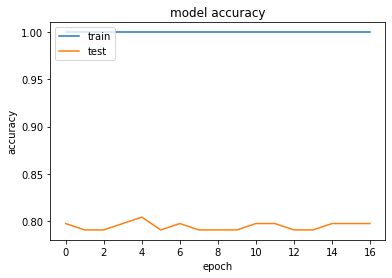

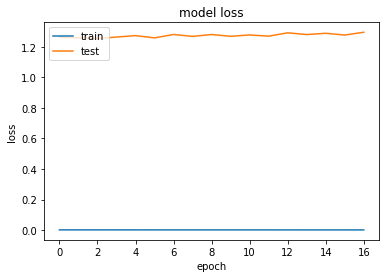

In [39]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

    empatGMB       0.80      0.74      0.77        27
     enamGMB       0.78      0.85      0.81        33
     limaGMB       0.93      0.82      0.87        34
     satuGMB       0.69      0.77      0.73        26
     tigaGMB       0.79      0.79      0.79        28

    accuracy                           0.80       148
   macro avg       0.80      0.79      0.79       148
weighted avg       0.80      0.80      0.80       148

